In [1]:
from PIL import Image
import numpy as np

col = Image.open("CENTER_FINAL.bmp")
gray = col.convert('L')

# Let numpy do the heavy lifting for converting pixels to pure black or white
bw = np.asarray(gray).copy()


In [2]:
uniqueVals=[]
for i in range(len(bw)):
    for j in range(len(bw[0])):
        if bw[i][j] not in uniqueVals:
            uniqueVals.append(bw[i][j])

In [3]:
uniqueVals

[255, 84, 38, 223, 59]

In [4]:
len(bw[bw == 59])

75105

In [5]:
len(bw[bw>=0])

235200

In [6]:
len(bw[bw!=255])

148862

In [7]:
# Pixel range is 0...255, 256/2 = 128
# bw[bw < 128] = 0    # Black
# bw[bw >= 128] = 255 # White
cpbw=bw

bw[bw != 59] = 255 # White
bw[bw == 59] = 0    # Black

# Now we put it back in Pillow/PIL land
bwImg = Image.fromarray(bw)
#imfile.save("result_bw.png")

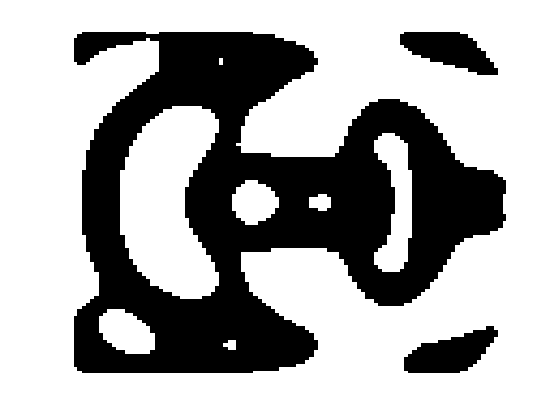

In [8]:
bwImg

In [9]:
type(bwImg)

PIL.Image.Image

In [13]:
bw.deepcopy()

AttributeError: 'numpy.ndarray' object has no attribute 'deepcopy'

In [8]:
len(bw[bw==255])

160095

In [9]:
len(bw[bw>=0])

235200

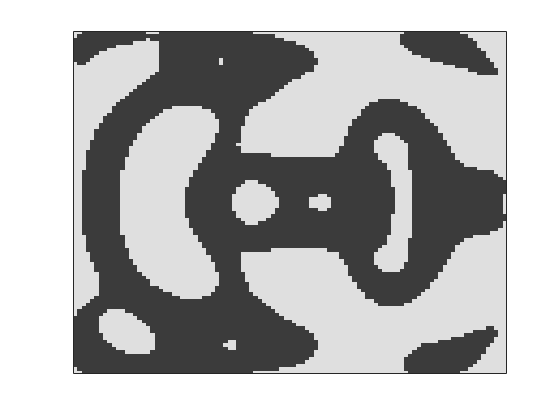

In [10]:
gray

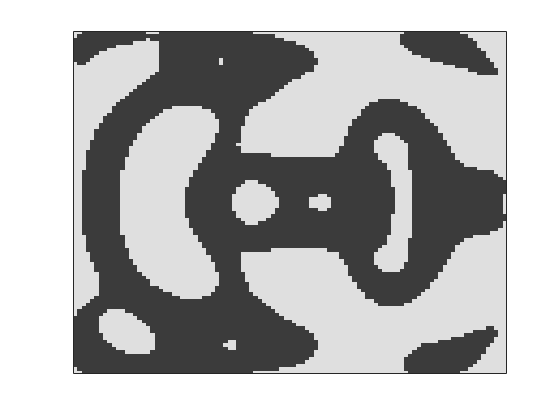

In [100]:
gray

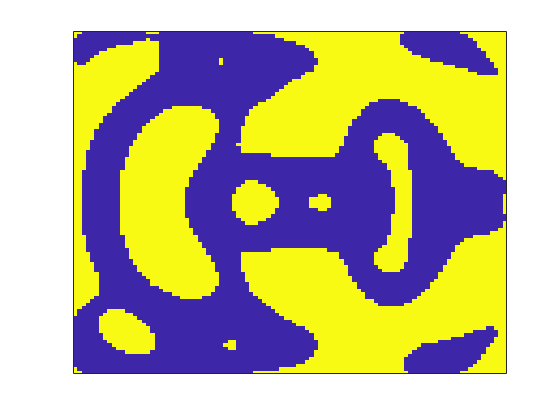

In [101]:
col

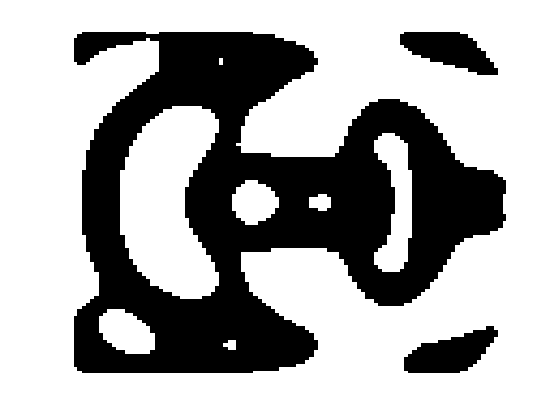

In [102]:
bwImg

In [103]:
import gdspy

In [116]:
def bWToGDS(Width, Height, bwArray, layer, datatype, matVal=0):
    #The Black Pixels will be represented as material, white is air
    YRes=len(bwArray)
    XRes=len(bwArray[0])
    pX=Width/XRes
    pY=Height/YRes
    rects=[]
    for i in range(len(bwArray)):
        for j in range(len(bwArray[0])):
           # print(bwArray[i][j])
            if bwArray[i][j]==matVal:
               # print("Adding Rect")
                #print((pX*i, pY*j))
                rects.append(gdspy.Rectangle((pX*j,-pY*i),(pX*(j+1), -pY*(i+1)), layer, datatype))
    patt=gdspy.boolean(rects[0], rects[1:], "or", max_points=0)
    
    return patt
    

In [117]:
poly=bWToGDS(1, 1, bw, 1, 1, matVal=0)

In [118]:
#poly=gdspy.boolean(poly[0], poly[1:], "or")

In [119]:
gdspy.current_library=gdspy.GdsLibrary()

In [120]:
cell=gdspy.Cell("bmpCellTest")

In [121]:
cell.add(poly)

In [122]:
gdspy.write_gds("Test.gds")